# Cálculo del valor de decisión óptimo y probabilidad de error en canales AWGN

## Consigna:

Considere un sistema de comunicaciones en donde el transmisor transmite dos hipótesis $H$ igualmente probables. Bajo la hipótesis $H=0$, la señal observada $Y$ por el receptor a la salida del canal es igual a $-1+Z$ donde $Z$ es una variable aleatoria Gaussiana $N(0,2)$.

Bajo la hipótesis $H=1$, $Y$ viene dado por $2+Z$.

1. Exprese matemáticamente las funciones de densidad de probabilidad condicional $f_{Y|H}(y|0)$ y $f_{Y|H}(y|1)$.
2. Realice un programa en una Jupyter Notebook que dibuje la funciones de densidad de probabilidad $f_{Y|H}(y|0)$ y  $f_{Y|H}(y|1)$.
3. Determine cualitativamente el nivel de decisión óptimo.  Bajo que regla la decisión es óptima?
4. Determine cuantitativamente el nivel de decisión óptimo.
5. Exprese la probabilidad de error P_e en términos de la función Q.
6. Utilice el siguiente código en Python para calcular el valor de Q con los argumentos obtenidos en el punto anterior:

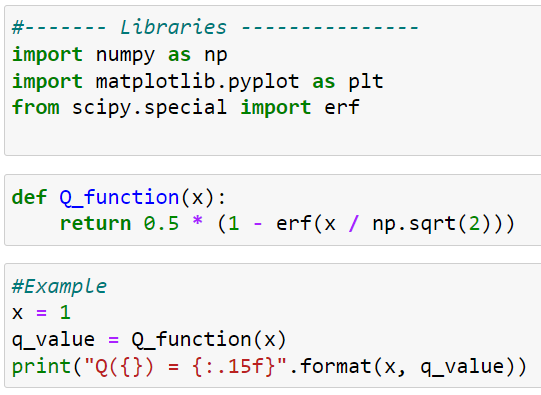


## Desarrollo:

### 1. Exprese matemáticamente las funciones de densidad de probabilidad condicional $f_{Y|H}(y|0)$ y $f_{Y|H}(y|1)$

Funciones de densidad de Probabilidad Condicional:

Teniendo en cuenta que $Z = N(\mu,\sigma) = \frac{1}{σ\sqrt{2π}} ⋅ e^{-\frac{(y-\mu)}{2 \cdot σ^2}}$

Al saber que si sumamos una variable aleatoria Gaussiana con una constante, el resultado de la misma es la misma Gaussiana pero con Media desplazada hacia el valor de la constante. Quedando así las funciones:

$\underline{H = 0} \rightarrow Y = - 1 + N(0,2) \therefore Y = N(-1,2) \rightarrow ...$

$... \rightarrow f_{Y|H}(y|0) = \frac{1}{σ\sqrt{2π}} ⋅ e^{-\frac{(y-\mu)}{2 \cdot σ^2}} = \frac{1}{2\sqrt{2π}} ⋅ e^{-\frac{(y-(-1))}{2 \cdot 2^2}} = \frac{1}{2\sqrt{2π}} ⋅ e^{-\frac{(y+1)}{8}}$

$\underline{H = 1} \rightarrow Y = 2 + N(0,2) \therefore Y = N(2,2) \rightarrow ...$

$... \rightarrow f_{Y|H}(y|1) = \frac{1}{σ\sqrt{2π}} ⋅ e^{-\frac{(y-\mu)}{2 \cdot σ^2}} = \frac{1}{2\sqrt{2π}} ⋅ e^{-\frac{(y-2)}{2 \cdot 2^2}} = \frac{1}{2\sqrt{2π}} ⋅ e^{-\frac{(y-2)}{8}}$

### 2. Realice un programa en una Jupyter Notebook que dibuje la funciones de densidad de probabilidad $f_{Y|H}(y|0)$ y  $f_{Y|H}(y|1)$

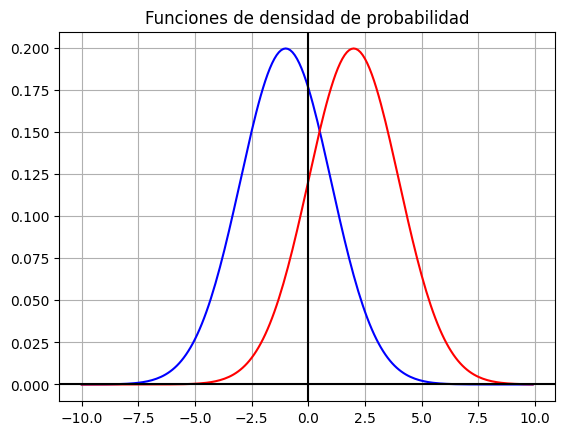

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generador de función de densidad de probabilidad normal
def Normal(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)/sigma)**2)

y = np.arange(-10,10,0.1)

# Generación de datos
plt.plot(y, [Normal(i,-1,2) for i in y], color = "blue")
plt.plot(y, [Normal(i,2,2) for i in y], color = "red")
plt.title("Funciones de densidad de probabilidad")
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.grid()
plt.show()

### 3. Determine cualitativamente el nivel de decisión óptimo.  Bajo que regla la decisión es óptima?

Cualitativamente hablando, luego de observar las funciones de densidad de probabilidad, sabemos que estamos tratando con una fuente equiprobable, por ende la regla de decisión óptima es la regla ML. Y el nivel de decisión óptimo es:

$\frac{\mu_0 + \mu_1}{2} = 0.5$ entonces para valores de $y > 0.5$ corresponde $\hat{H} = 1$ y $\hat{H}=0$ para caso contrario.

### 4. Determine cuantitativamente el nivel de decisión óptimo

Regla de decisión ML:

$\underline{H = 0} \rightarrow \frac{1}{2\sqrt{2π}} ⋅ e^{-\frac{(y+1)}{8}}$

$\underline{H = 1} \rightarrow \frac{1}{2\sqrt{2π}} ⋅ e^{-\frac{(y-2)}{8}}$

Utilizando la desigualdad:

$\frac{1}{2\sqrt{2π}} ⋅ e^{-\frac{(y-2)}{8}} \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} \frac{1}{2\sqrt{2π}} ⋅ e^{-\frac{(y+1)}{8}} = e^{-\frac{(y-2)}{8}} \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} e^{-\frac{(y+1)}{8}} = \ln(e^{-\frac{(y-2)}{8}}) \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} \ln(e^{-\frac{(y+1)}{8}}) = \\ = -\frac{(y-2)}{8} \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} -\frac{(y+1)}{8} = -(y-2) \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} -{(y+1)} = y-2 \overset{\hat{H}=1}{\underset{\hat{H}=0}\gtreqless} y+1 \rightarrow$ Si seguimos asi llegamos a un camino sin salida.

Entonces se me ocurrió utilizar el valor de $\mu0$ y $\mu1$ para calcular el punto medio en que se chocan ambas distribuciones, quedando asi:

$\frac{\mu_0 + \mu_1}{2} = 0.5$ entonces para valores de $y > 0.5$ corresponde $\hat{H} = 1$ y $\hat{H}=0$ para caso contrario. Esto se puede debido a que ambas distribuciones son iguales y equiprobables.

### 5. Exprese la probabilidad de error $P_e$ en términos de la función Q.

Funcion Q $\rightarrow Q(x) := \frac{1}{\sqrt{2\pi}}\int_{x}^{\infin}e^{-\frac{\xi^2}{2}}d\xi$

Utilizando el extracto del libro Bixio: 

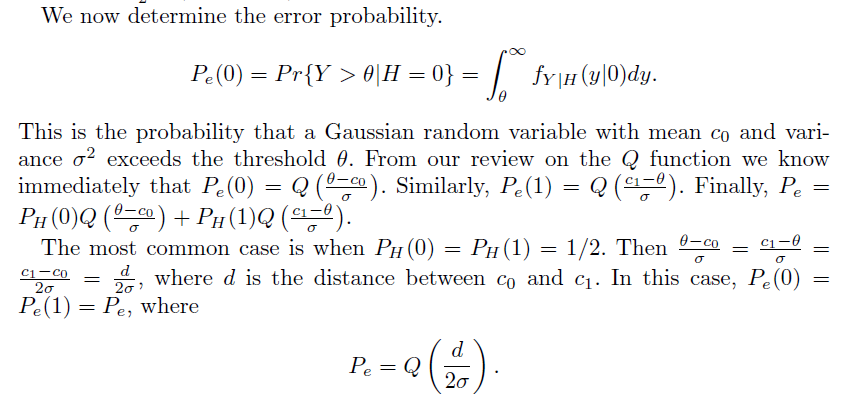

Sabiendo que la fuente es equiprobable, podemos simplificar los calculos, entonces la probabilidad de error $P_e$ en términos de la función Q es:

$P_e = Q(\frac{\mu1-\mu0}{2\sigma}) = Q(\frac{2-(-1)}{2*2}) = Q(\frac{3}{4})$

### 6. Utilice el siguiente código en Python para calcular el valor de Q con los argumentos obtenidos en el punto anterior:

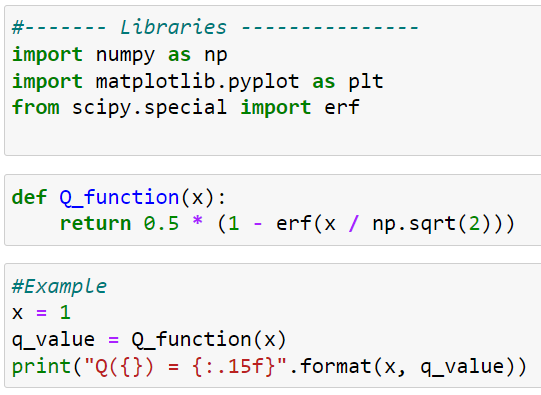

In [15]:
from scipy.special import erf

def Q_function(x):
    return 0.5 * (1 - erf(x/np.sqrt(2)))

# Metodo abreviado
x = 3/4
q_value = Q_function(x)
print("Q({}) = {:.15f}".format(x, q_value))

# Calculo Completo
x1 = ((0.5 + 1)/2)
x2 = ((2 - 0.5)/2)

q_value = Q_function(x1) * 0.5 + Q_function(x2) * 0.5
print("Q({}) = {:.15f}".format(x, q_value))

Q(0.75) = 0.226627352376868
Q(0.75) = 0.226627352376868
